In [16]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from multiprocessing import Pool
from src.mp_script import clusterKMean
from functools import partial
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from joblib import dump
import seaborn as sns

RandomState = 1

In [15]:
def plotClusteringScore(res_kmean):
    kmean_num = list(res_kmean.keys())
    kmean_WCSS = [res_kmean[i]['WCSS'] for i in kmean_num]
    kmean_sil_score = [res_kmean[i]['silhouette_score'] for i in kmean_num]
    
    fig, ax = plt.subplots(ncols=2, figsize=(14, 3))
    ax[0].scatter(kmean_num, kmean_WCSS)
    ax[0].plot(kmean_num, kmean_WCSS)
    ax[0].set_xlabel("K")
    ax[0].set_ylabel("WCSS")
    
    ax[1].scatter(kmean_num, kmean_sil_score)
    ax[1].plot(kmean_num, kmean_sil_score)
    ax[1].set_xlabel("K")
    ax[1].set_ylabel("silhouette_score")
    
    
    plt.legend(loc='upper right')
    plt.show()

def plotHistrogram(df:pd.DataFrame, hue=None, palette=None):
    cols = df.columns
    plot_cols = 5
    plot_row = round((len(cols)/plot_cols)+1)
    plot_num = 1
    plt.figure(figsize=(plot_cols*6, plot_row*6))
    for i in tqdm(cols):
        ax = plt.subplot(plot_row, plot_cols, plot_num)
        sns.histplot(data=df, x=i, kde=True, hue=hue, palette=palette)
        plot_num += 1
    plt.show()

##### Team fight data

In [6]:
team_stat_on_time = pd.read_csv("./new_dataframe/team_stat_on_time.csv", index_col=0)
new_teamfight_df = pd.read_csv("./new_dataframe/new_teamfight_df.csv", index_col=0)
##### calculate time before team fight and merge to team status on times
new_teamfight_df['time_before_fight'] = new_teamfight_df['start'] - new_teamfight_df['start']%60
new_teamfight_df = new_teamfight_df.drop(['start', 'end'], axis=1)
teamfight = new_teamfight_df.merge(team_stat_on_time, left_on=['match_id', 'time_before_fight'], right_on=['match_id', 'times'])
teamfight = teamfight.drop(['times'], axis=1)
teamfight['radiant_benefit'] = (teamfight['radiant_total_delta_gold'] + teamfight['radiant_total_delta_xp']) > (teamfight['dire_total_delta_gold'] + teamfight['dire_total_delta_xp'])
teamfight['radiant_benefit'] = teamfight['radiant_benefit'].replace([False, True], [0, 1])

- cluster delta gold and XP
    - ['radiant_total_delta_gold', 'dire_total_delta_gold', 'radiant_total_delta_xp', 'dire_total_delta_xp']

In [3]:
if __name__ ==  '__main__':
    ##### scale for cluster
    scaler = MinMaxScaler()
    cluster_delta_stat_df = teamfight[['radiant_total_delta_gold', 'dire_total_delta_gold', 'radiant_total_delta_xp', 'dire_total_delta_xp']]
    x_scale = scaler.fit_transform(cluster_delta_stat_df.values)
    scale_df = pd.DataFrame(x_scale, columns=cluster_delta_stat_df.columns)
    with Pool(processes=8) as p:
        cluster_delta_stat_score = p.map(partial(clusterKMean, scale_df), tqdm(range(2,10,1)))
        p.close()
        p.join()
        print('finish')
    cluster_delta_stat_score_dict = {}
    [cluster_delta_stat_score_dict.update(i) for i in cluster_delta_stat_score]
    plotClusteringScore(cluster_delta_stat_score_dict)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 26.95it/s]


finish


In [19]:
# dump(cluster_delta_stat_score_dict[3]['model'], 'cluster_delta_stat.joblib')

['teamfight_cluster.joblib']

- cluster team stat
    - ['radiant_gold_t_', 'dire_gold_t_', 'radiant_xp_t_', 'dire_xp_t_', 'radiant_lh_t_', 'dire_lh_t_']

100%|██████████| 8/8 [1:59:54<00:00, 899.29s/it]   


finish


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


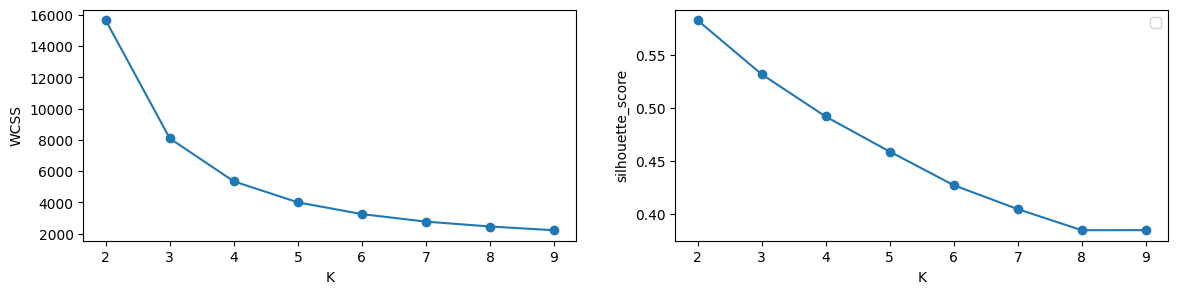

In [7]:
if __name__ ==  '__main__':
    ##### scale for cluster
    scaler = MinMaxScaler()
    cluster_teamfight_stat_df = teamfight[['radiant_gold_t_', 'dire_gold_t_', 'radiant_xp_t_', 'dire_xp_t_', 'radiant_lh_t_', 'dire_lh_t_']]
    x_scale = scaler.fit_transform(cluster_teamfight_stat_df.values)
    scale_df = pd.DataFrame(x_scale, columns=cluster_teamfight_stat_df.columns)
    with Pool(processes=4) as p:
        cluster_teamfight_stat_score = p.map(partial(clusterKMean, scale_df), tqdm(range(2,10,1)))
        p.close()
        p.join()
        print('finish')
    cluster_teamfight_stat_score_dict = {}
    [cluster_teamfight_stat_score_dict.update(i) for i in cluster_teamfight_stat_score]
    plotClusteringScore(cluster_teamfight_stat_score_dict)


In [9]:
dump(cluster_teamfight_stat_score_dict[2]['model'], 'cluster_teamfight_stat_2.joblib')

['cluster_teamfight_stat_2.joblib']

##### match data

In [18]:
new_match_df = pd.read_csv("./new_dataframe/new_match_df.csv", index_col=0)
new_match_df['radiant_total_leaver_status'] = new_match_df['radiant_total_leaver_status'].replace(list(range(10)), [0, 0, 1, 1, 1, 1, 1, 1, 1, 1])
new_match_df['dire_total_leaver_status'] = new_match_df['dire_total_leaver_status'].replace(list(range(10)), [0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

- cluster radiant and dire total stuns
    - ['radiant_total_stuns', 'dire_total_stuns']

100%|██████████| 8/8 [00:00<00:00, 48.78it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


finish


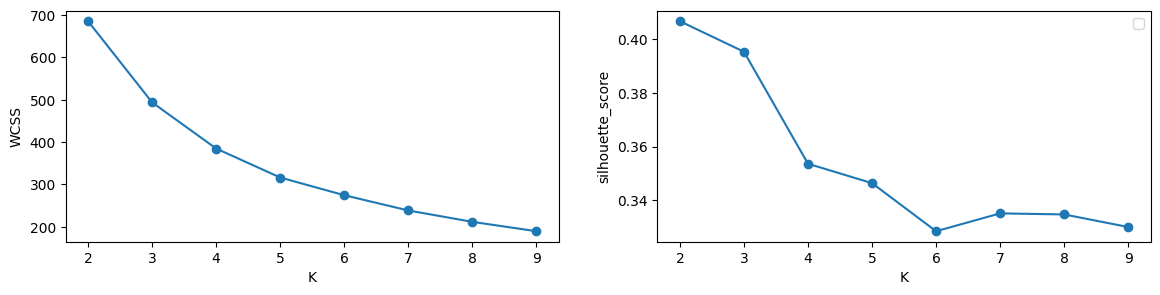

In [14]:
if __name__ ==  '__main__':
    ##### scale for cluster
    scaler = MinMaxScaler()
    cluster_stuns_df = new_match_df[['radiant_total_stuns', 'dire_total_stuns']]
    x_scale = scaler.fit_transform(cluster_stuns_df.values)
    scale_df = pd.DataFrame(x_scale, columns=cluster_stuns_df.columns)
    with Pool(processes=8) as p:
        cluster_stuns_score = p.map(partial(clusterKMean, scale_df), tqdm(range(2,10,1)))
        p.close()
        p.join()
        print('finish')
    cluster_stuns_score_dict = {}
    [cluster_stuns_score_dict.update(i) for i in cluster_stuns_score]
    plotClusteringScore(cluster_stuns_score_dict)

In [21]:
dump(cluster_stuns_score_dict[2]['model'], 'cluster_stuns.joblib')

['cluster_stuns.joblib']

100%|██████████| 37/37 [00:14<00:00,  2.54it/s]


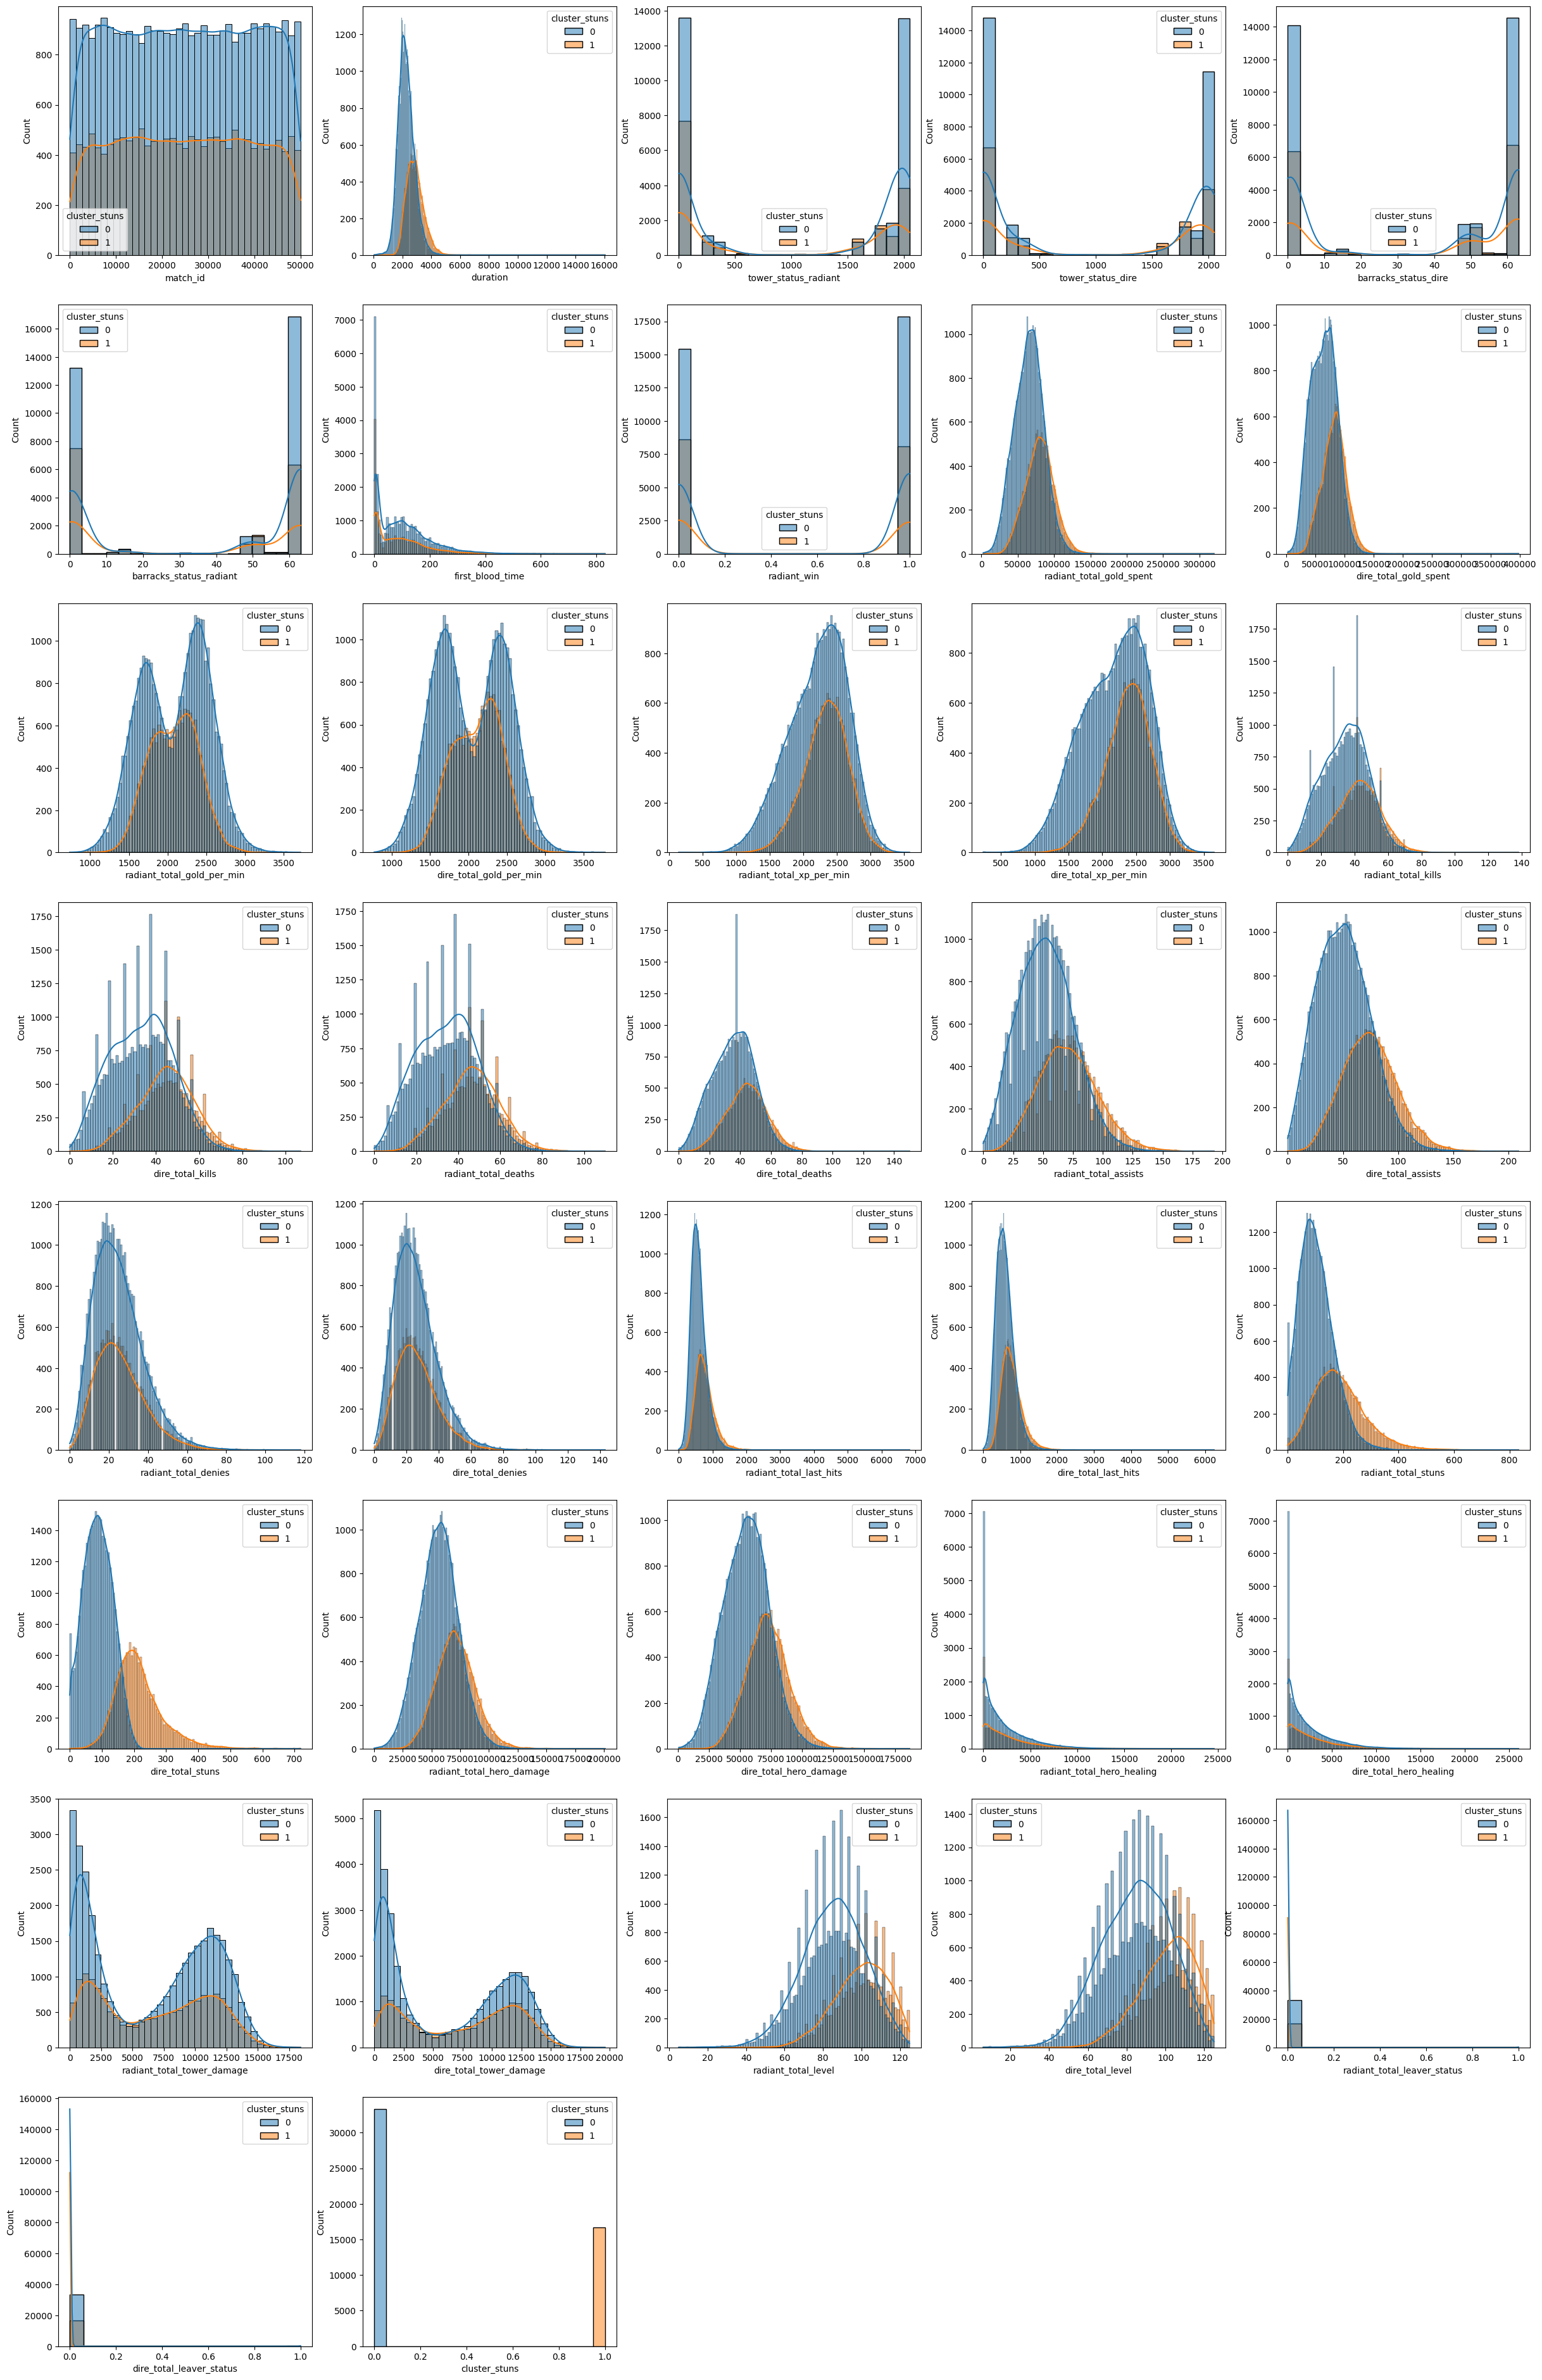

In [20]:
cluster_stuns = cluster_stuns_score_dict[2]['model']
new_match_df['cluster_stuns'] = cluster_stuns.labels_
plotHistrogram(new_match_df, hue='cluster_stuns')

100%|██████████| 37/37 [00:17<00:00,  2.16it/s]


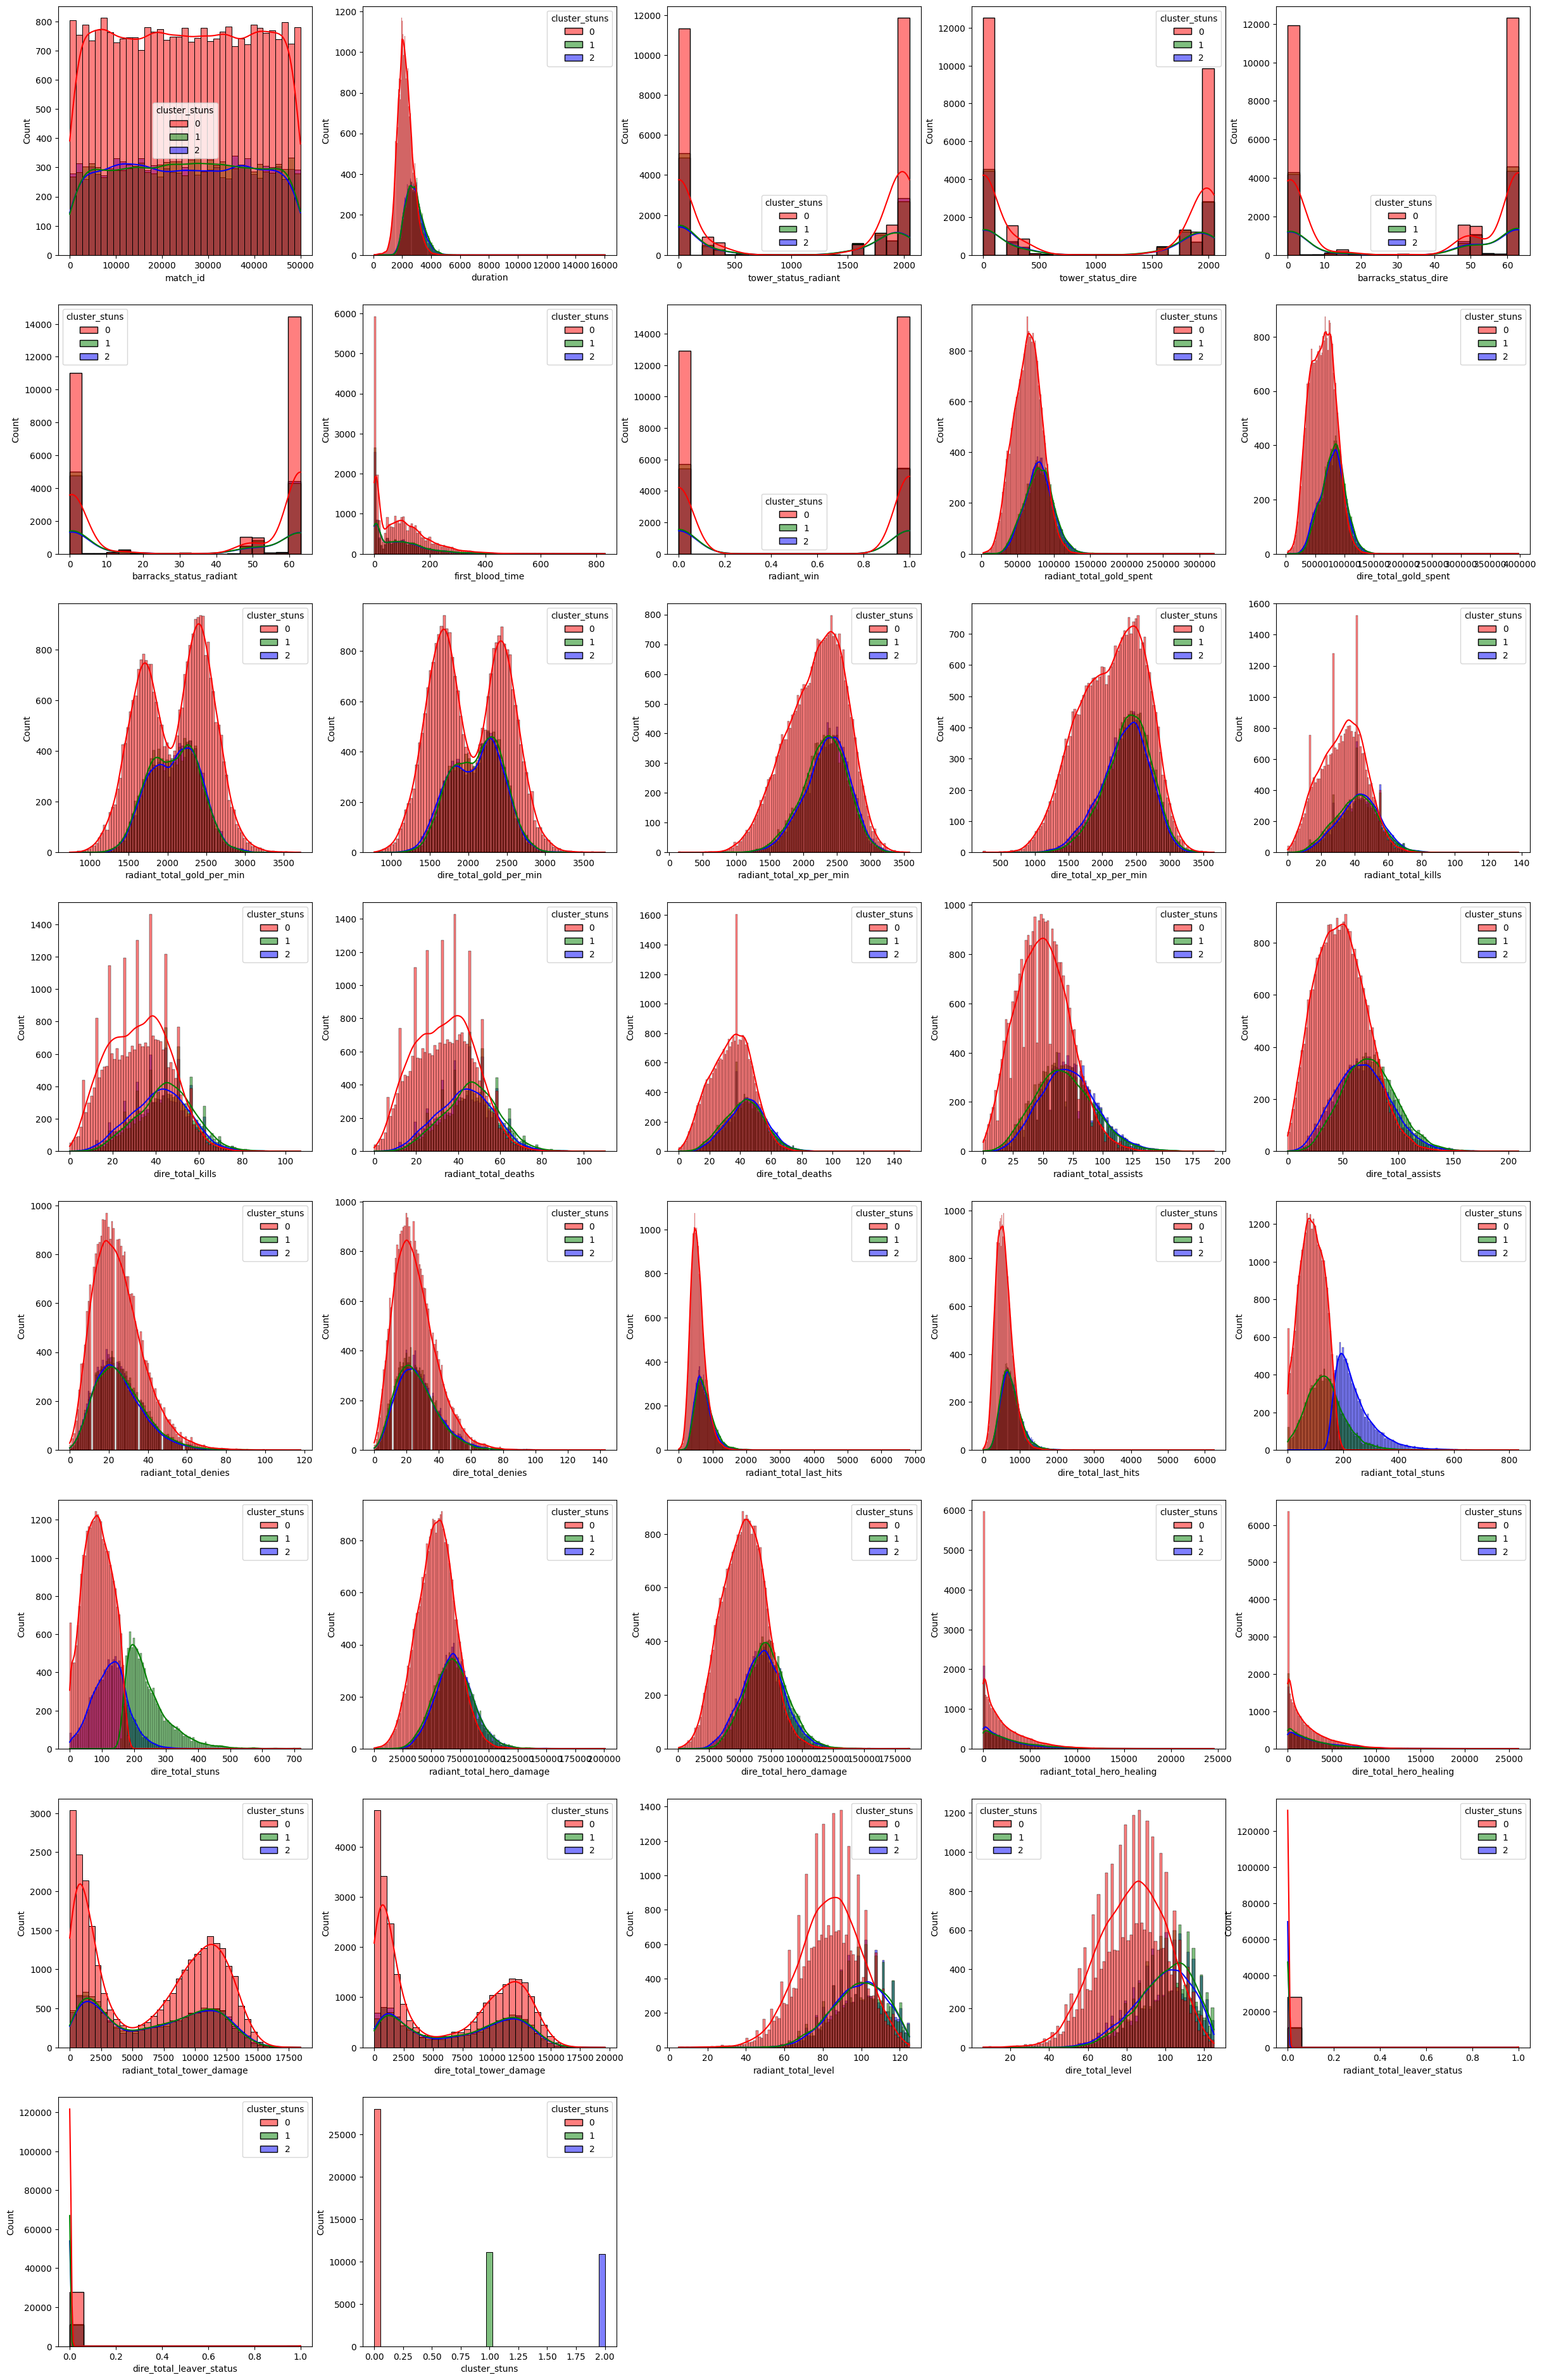

In [22]:
cluster_stuns = cluster_stuns_score_dict[3]['model']
new_match_df['cluster_stuns'] = cluster_stuns.labels_
plotHistrogram(new_match_df, hue='cluster_stuns', palette=['r', 'g', 'b'])

##### Player statistic in match

In [ ]:
player_df = pd.read_csv('players.csv')
player_df = player_df.iloc[:, 0:25]
player_df = player_df.drop(['gold', 'account_id', 'item_0', 'item_1', 'item_2', 'item_3', 'item_4', 'item_5'], axis=1)
player_df['stuns'] = player_df['stuns'].replace(['None'], [0.0])
player_df['stuns'] = player_df['stuns'].astype(np.float64)
player_df['leaver_status'] = player_df['leaver_status'].replace(list(range(5)), [0, 0, 1, 1, 1])

- cluster player score
    - ['gold_spent', 'gold_per_min', 'xp_per_min', 'kills', 'deaths', 'assists', 'denies', 'last_hits', 'stuns', 'hero_damage', 'hero_healing', 'tower_damage']

In [2]:
if __name__ ==  '__main__':
    ##### scale for cluster
    scaler = MinMaxScaler()
    player_cluster_df = player_df[['gold_spent', 'gold_per_min', 'xp_per_min', 'kills', 'deaths', 'assists', 'denies', 'last_hits', 'stuns', 'hero_damage', 'hero_healing', 'tower_damage']]
    x_scale = scaler.fit_transform(player_cluster_df.values)
    scale_df = pd.DataFrame(x_scale, columns=player_cluster_df.columns)
    with Pool(processes=8) as p:
        player_stat_cluster_score = p.map(partial(clusterKMean, scale_df), tqdm(range(2,10,1)))
        p.close()
        p.join()
        print('finish')
    player_stat_cluster_dict = {}
    [player_stat_cluster_dict.update(i) for i in player_stat_cluster_score]

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.24it/s]


finish


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


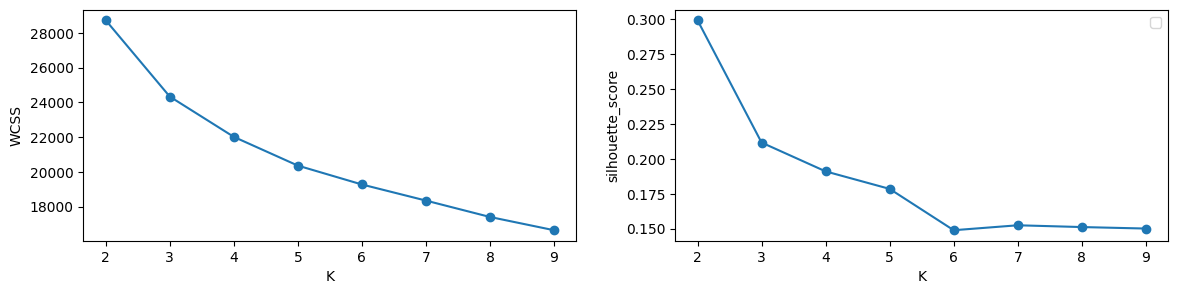

In [12]:
plotClusteringScore(player_stat_cluster_dict)

In [20]:
# dump(new_dic2[2]['model'], 'player_stat_cluster.joblib')

['player_cluster.joblib']